In [1]:
#Libraries
from math import floor, exp, sqrt, pi
import cmath
import numpy
from numpy import e, cos, zeros, arange, roll, where, random, ones, mean, reshape, dot, array, flipud, pi, exp, dot, angle, degrees, shape, linspace
import matplotlib.pyplot as plt
from itertools import chain
import scipy
from scipy import special
import seaborn as sns


In [12]:
#Parameters

totalTime=2000;
dt=2;
nsteps=int(floor(totalTime/dt));
num_cicles=10;

    
N=512;
origin = pi
rE=zeros((N,1));
rI=zeros((N,1));


#temporal variable (largerT means smaller firing rate)
tauE=  9#9; 
tauI=  4; 

#Conductances (larger G means larger firing rate). Diff cond. for connections
GEE=  0.021
GEI=  0.020 
GIE=  0.01  
GII=  0.07  
I0E=  0.2##0.2; (as it decreases --> less bumps)
I0I=  0.5##0.5; (as it increases --> less bumps)

#Realted with noise
sigE=  1.5 #1.5 #1 #0.5 ;
sigI=  1.6 #1.6 #2 #1.3 ;

#Stimulus (when on and off, separation between them and strenght)
stim_onset = 100;
stim_offset = 500;

n_stims=1; #2
stim_sep = pi/10 ###13 --> 2   (13 attract, 9 solo 1, 5 repulsion, 2 nada)
#stim_sep=0

kappa_stim1= 100 
kappa_stim2= 100 


kappa_E=  100  #100          original#600
kappa_I=   2.75 #1.75 -2 .75#####3   #3    ###############0.5 - 5     original#5


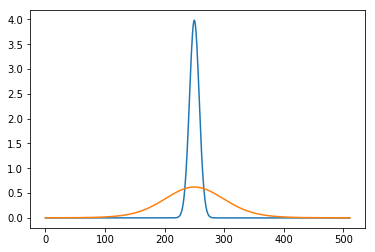

In [13]:
#Connectivities

v_E=zeros((N));
v_I=zeros((N));
WE=zeros((N,N));
WI=zeros((N,N));


theta = [float(range(0,N)[i])/N*2*pi for i in range(0,N)] 

for i in range(0, N):
    v_E_new=[e**(kappa_E*cos(theta[f]))/(2*pi*scipy.special.i0(kappa_E)) for f in range(0, len(theta))]    
    v_I_new=[e**(kappa_I*cos(theta[f]))/(2*pi*scipy.special.i0(kappa_I)) for f in range(0, len(theta))]
    ###    
    vE_NEW=roll(v_E_new,i)
    vI_NEW=roll(v_I_new,i) #to roll
    ###    
    WE[:,i]=vE_NEW
    WI[:,i]=vI_NEW

    
    
    
plt.plot(WE[250, :])
plt.plot(WI[250, :])
plt.show(block=False)


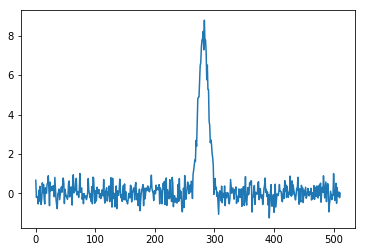

In [14]:
# stims
import numpy as np 
stimulus1=zeros((N))
stimulus2=zeros((N))

for i in range(0, N):
    stimulus1[i]=2*e**(kappa_stim1*cos(theta[i] + origin - stim_sep)) / (2*pi*scipy.special.i0(kappa_stim1)) 
    stimulus2[i]=2*e**(kappa_stim2*cos(theta[i] + origin + stim_sep)) / (2*pi*scipy.special.i0(kappa_stim2)) 


stimulus1 = stimulus1+ np.random.normal(0, 0.4, N)
stimulus2 = stimulus2+ np.random.normal(0, 0.4, N)

    
if n_stims==2:
    stimulus= (stimulus1 + stimulus2);
    stimulus=reshape(stimulus, (N,1))
elif n_stims==1:
    stimulus2=zeros((N));
    stimulus= (stimulus1 + stimulus2);
    stimulus=stimulus1
    stimulus=reshape(stimulus, (N,1))


######################


stimon = floor(stim_onset/dt);
stimoff = floor(stim_offset/dt);

plt.plot(stimulus)
plt.show(block=False)

In [15]:
#Simulation


#generation of the noise and the connectivity between inhib and exit
RE=zeros((N,nsteps));
RI=zeros((N,nsteps));


f = lambda x : x*x*(x>0)*(x<1) + reshape(array([cmath.sqrt(4*x[i]-3) for i in range(0, len(x))]).real, (N,1)) * (x>=1)


### diferential equations
for i in range(0, nsteps):
    noiseE = sigE*random.randn(N,1);
    noiseI = sigI*random.randn(N,1);
    
    #differential equations for connectivity
    IE= GEE*dot(WE,rE) - GIE*dot(WI,rI) + I0E*ones((N,1)); #Antes el primer término era: GEE*WE*rE ahora solo esta WE_GEE ya que hay una GEE para cada distancia
    II= GEI*dot(WE,rE) +  (I0I-GII*mean(rI))*ones((N,1));
    
    if i>stimon and i<stimoff:
        IE=IE+stimulus;
        II=II+stimulus;
    
    
    #rates of exit and inhib
    rE = rE + (f(IE) - rE + noiseE)*dt/tauE;
    rI = rI + (f(II) - rI + noiseI)*dt/tauI;
    
    rEr=reshape(rE, N)
    rIr=reshape(rI, N)
    #drawnow
    RE[:,i] = rEr;
    RI[:,i] = rIr;
    






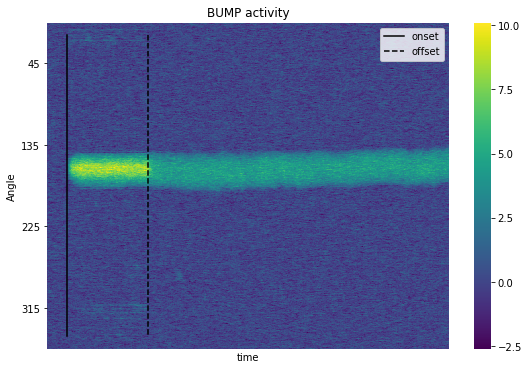

In [16]:
### Plot of activity
RE_sorted=flipud(RE)
plt.figure(figsize=(9,6))
sns.heatmap(RE_sorted, cmap='viridis')
plt.title('BUMP activity')
plt.ylabel('Angle')
plt.xlabel('time')
plt.yticks([])
plt.xticks([])

plt.yticks([N/8, 3*N/8, 5*N/8, 7*N/8 ] ,['45','135','225', '315'])

plt.plot([stim_onset/2, stim_onset/2,], [0+20, N-20], 'k-', label='onset')
plt.plot([stim_offset/2, stim_offset/2,], [0+20, N-20], 'k--', label='offset')

plt.legend()
plt.show(block=False)